# Histogramas de densidades en el halo de materia oscuro

Importar librerias

```{notebook}

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm 
import numpy as np

 Funcion para graficar  la densidad de las posiciones de los halos individuales  </p>



In [2]:
def cartessian_projection(pos, figname):
   fig, ax = plt.subplots(1, 3, figsize=(17,5), sharex=True)
   ax[0].hist2d(pos['x[kpc]'], pos['y[kpc]'],  bins=np.linspace(-100,100,800), norm=LogNorm(), cmap = 'plasma')
   ax[0].set_xlabel(r"x[$kpc$]") 
   ax[0].set_ylabel(r"y[$kpc$]") 
   ax[0].title.set_text("Proyección en xy")
   ax[1].hist2d(pos['x[kpc]'], pos['z[kpc]'],  bins=np.linspace(-100,100,800), norm=LogNorm(), cmap = 'plasma')
   ax[1].set_xlabel(r"x[$kpc$]") 
   ax[1].set_ylabel(r"z[$kpc$]") 
   ax[1].title.set_text("Proyección en xz")
   ax[2].hist2d(pos['y[kpc]'], pos['z[kpc]'],  bins=np.linspace(-100,100,800), norm=LogNorm(), cmap = 'plasma')
   ax[2].set_xlabel(r"y[$kpc$]") 
   ax[2].set_ylabel(r"z[$kpc$]") 
   ax[2].title.set_text("Proyección en yz")

   # im0 = ax[0].imshow(np.log10(np.abs(pos['x[kpc]'])), cmap='plasma')

   fig.subplots_adjust(wspace=0.3)
   # plt.tight_layout()
   fig.suptitle("Graficos de "+figname)
   # plt.colorbar(im0, ax=ax[0])
   plt.savefig('./../media/imgs/'+figname +'.jpg', bbox_inches='tight', dpi = 900)
   

   plt.close()
   return 0



## Lectura de datos

In [13]:
reference = pd.read_csv('../data/raw_halo.txt', names=["x[kpc]","y[kpc]","z[kpc]","vx[km/s]","vy[km/s]","vz[km/s]"], sep=" ")
perturbed = pd.read_csv('../data/halo.txt', names=["x[kpc]","y[kpc]","z[kpc]","vx[km/s]","vy[km/s]","vz[km/s]"], sep=" ")

df = pd.DataFrame(reference)
df2 = pd.DataFrame(perturbed)

<p> Uso de la funcion 'cartesian_projection' para graficar </p>


In [14]:
cartessian_projection(df, "Halo_no_pertubado")
cartessian_projection(df2, "Halo_pertubado")


0

<p> Calculo de los histogramas haciendo uso de la funcion 'histogram2d' de la libreria Numpy </p>

In [32]:
y_bins = np.linspace(-200, 200, 800) 
z_bins = np.linspace(-200, 200, 800)

density1 = np.histogram2d(df['x[kpc]'], df['y[kpc]'],   bins=[np.linspace(-100,100,800)] )
# print("x",density1[0].shape, "\n", density1[1].shape)
print(density1[0])

density2 = np.histogram2d(df2['x[kpc]'], df2['y[kpc]'],  bins=np.linspace(-100,100,800))
# print("Density background halo","\n", density1[0],"\n", "Density halo movement","\n", density2[0])

# print(density1[0].shape)
# print(density2[0].shape)

(array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array([-100.        ,  -99.74968711,  -99.49937422,  -99.24906133,
        -98.99874844,  -98.74843554,  -98.49812265,  -98.24780976,
        -97.99749687,  -97.74718398,  -97.49687109,  -97.2465582 ,
        -96.99624531,  -96.74593242,  -96.49561952,  -96.24530663,
        -95.99499374,  -95.74468085,  -95.49436796,  -95.24405507,
        -94.99374218,  -94.74342929,  -94.4931164 ,  -94.2428035 ,
        -93.99249061,  -93.74217772,  -93.49186483,  -93.24155194,
        -92.99123905,  -92.74092616,  -92.49061327,  -92.24030038,
        -91.98998748,  -91.73967459,  -91.4893617 ,  -91.23904881,
        -90.98873592,  -90.73842303,  -90.48811014,  -90.23779725,
        -89.98748436,  -89.73717146,  -89.48685857,  -89.23654568,
        -88.98623279

<p>Division de las primeras columnas de cada matriz densidad. </p>

C:\Users\Stephanie Cely\AppData\Local\Temp\ipykernel_5440\3029258879.py:17: RuntimeWarning: divide by zero encountered in true_divide
  division = np.divide(nparticles2,nparticles-1)
C:\Users\Stephanie Cely\AppData\Local\Temp\ipykernel_5440\3029258879.py:17: RuntimeWarning: invalid value encountered in true_divide
  division = np.divide(nparticles2,nparticles-1)


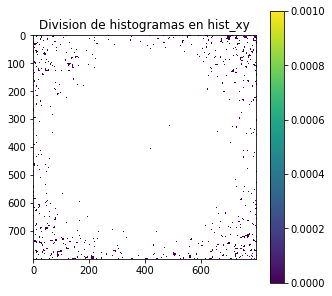

0

In [29]:
nparticles = density1[0]
nparticles2 = density2[0]


def cartessian_projection4 (density, figname ):
    fig, ax = plt.subplots(1, 1, figsize=(5,5))
    im = ax.imshow(density, vmin = 0, vmax=30)
    plt.colorbar(im) 
    plt.title("Division de histogramas en "+figname)
    plt.savefig('./../media/imgs/'+figname +'.jpg', bbox_inches='tight', dpi = 300)
    plt.show()
    plt.close()
    return 0



division = np.divide(nparticles2,nparticles-1)
# index = np.where(-1e20>division <1e20)
# print(division(index))

# print(division)\
# print("El max es",np.max(division))
cartessian_projection4(division, "hist_xy")





In [11]:
# import numpy as np
# import matplotlib.pyplot as plt

# X, Y = np.meshgrid(xlist, ylist)
# Z = np.sqrt(X**2 + Y**2)
# fig,ax=plt.subplots(1,1)
# cp = ax.contourf(X, Y, Z)
# fig.colorbar(cp) # Add a colorbar to a plot
# ax.set_title('Filled Contours Plot')
# #ax.set_xlabel('x (cm)')
# ax.set_ylabel('y (cm)')
# plt.show()